In [457]:
import random
import numpy as np
import matplotlib.pyplot as plt
import math


from scipy.optimize import brute,fminbound
from scipy.integrate import odeint
from scipy.stats import norm

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

### Q3

#### (a)

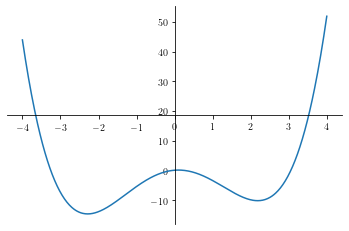

In [458]:
def U(x):
    return x**4 / 2.0 - 5 * x**2 + x

def dUdx(x):
    return 2 * x**3 - 10*x + 1

fig, ax = plt.subplots()
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

x = np.linspace(-4, 4, 500)
ax.plot(x, U(x))
plt.show()

Now that we have a graphical representation of $U(x)$, we put bounds for the search global and local minimum. 

In [459]:
grid = (-4, 4, 0.1)
xmin_global,  = brute(U, (grid, ))
xmin_local = fminbound(U , 0, 4)

print("Global minimum x = {:.4f}  and local minimum x = {:.4f}".format(xmin_global, xmin_local))


Global minimum x = -2.2845  and local minimum x = 2.1843


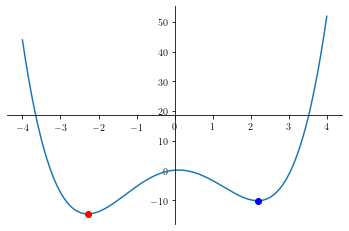

In [460]:
fig, ax = plt.subplots()
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

x = np.linspace(-4, 4, 500)
ax.plot(x, U(x))
ax.plot(xmin_global, U(xmin_global), 'ro')
ax.plot(xmin_local, U(xmin_local), 'bo')
plt.show()

assert(math.isclose(dUdx(xmin_global), 0.0, abs_tol=1e-3))
assert(math.isclose(dUdx(xmin_local), 0.0, abs_tol=1e-3))

##### (b)

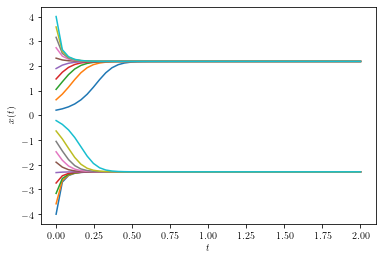

In [464]:
fig, ax = plt.subplots()
ax.set_xlabel(r'$t$')
ax.set_ylabel(r"$x(t)$")
x = np.linspace(-4,4,20)
tf = 2

def dUdt(x, t):
    return -1.0 * dUdx(x)

for x0 in x:
    # time points
    t = np.linspace(0, tf)
    # solve ODE
    x = odeint(dUdt, x0, t)
    # plot results
    ax.plot(t, x)
plt.show()

if $x(0) > 0$ the ODE Solver converges to the local minimum where else if $x(0) < 0$ it converges to the global minimum.  

#### (c)

In [467]:
def dW(dt): 
    return norm.rvs(loc = 0.0, scale = np.sqrt(dt))

dt  = 0.005
init = [(.25, 0, 100), (.25,  -5, 100), (.25,  5, 100), (.5, 10, 10), (.5, -10, 10)]
N = len(init)
xs = [[None]] * N
tspans = [[None]] * N 

for i in range(N):
    sig, x0, tf = init[i]
    n = int(tf / dt)
    x = np.zeros(n)
    x[0] = x0
    tspans[i] = np.linspace(0, tf, n)
    for j in range(n-1):
        x[j+1] =x[j] - 2 * x[j]**3 * dt + 10* x[j] * dt - dt + sig * dW(dt)
    xs[i] = x

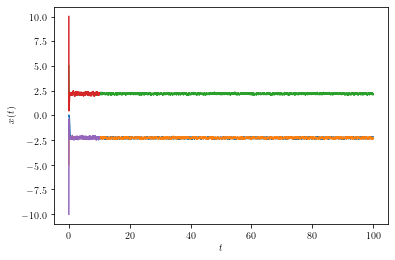

In [468]:
fig, ax = plt.subplots()
ax.set_ylabel(r'$x(t)$')
ax.set_xlabel(r'$t$')
for i in range(N):
    ax.plot(tspans[i], xs[i])
plt.show()

For large enough $\sigma$ and $t_f$, the descent path will oscillate between minima indefintely. It is for this reason that we consider stochastic relation which reduces the noise with time, settling the descent in some small neighborhood most likely around the global minimum.

In [471]:
tf = 100
dt = 0.01
n = int(tf/dt)
alpha = 10
x = np.zeros(n)
tspan = np.linspace(0, tf, n)

x[0] = 10
sig = alpha/(tspan[0] + 1)
for i in range(n-1):
    x[i+1] = x[i] -2 * x[i]**3 * dt + 10 * x[i] * dt - dt + sig * dW(dt)
    sig = alpha/(tspan[i] + 1)

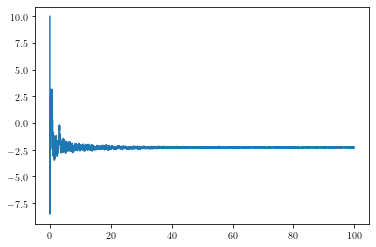

In [472]:
fig, ax = plt.subplots()
ax.plot(tspan,x)
plt.show()


Deterministic gradient descent is very realient on the knowledge of the structure of the function, which one then uses this to choose sensible starting position of the descent.  This is disadvantageous when especially when dealing with functions in higher dimensions which might be hard to visualize. Wherelse stochastic gradient descent if one starts with large enough noise parameter we can explore all the extrema points and with relaxation, we can settle the descent most likely around some neighborhood around the global minimum, indepedent of the starting point.

### Q4

 $\ddot{\theta}(t) +[1 + A\cos{\omega t}]\sin\theta(t) + k\dot{\theta(t)} = 0$

Let $\nu= \dot{\theta}$, thus

$\theta = \int \nu(t) dt$


$\dot{\nu}(t) +[1 + A\cos{\omega t}]\sin\theta(t) + k\nu(t) = 0$

In [473]:
def pend(z, t, A, w, k):
    theta, nu = z
    dzdt = [nu, -(1.0 + A * np.cos(w * t)) * np.sin(theta) - k * nu]
    return dzdt

In [474]:
tf = 20
x0 = [0.75 * np.pi, 0]
dt = 0.01
n = int(tf / dt)
t = np.linspace(0, tf, n)
y = odeint(pend, x0, t, args=(20, 10, 0.5))

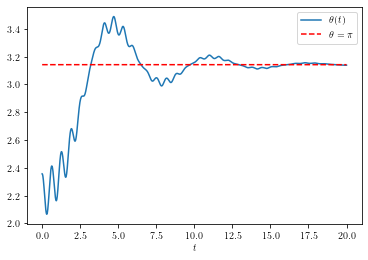

In [475]:
fig, ax = plt.subplots()

ax.plot(t,y[:,0], label=r'$\theta(t)$')
ax.plot(t,np.pi*np.ones(n),'r--',label = r'$\theta = \pi$')
ax.set_xlabel(r'$t$')
ax.legend()
plt.show()

### (b)

In [491]:
tf = 50
dt = 0.05
n = int(tf/dt)

tspan = np.linspace(0, tf, n) 
A = 20
w = 8
k = 0.5
eta = np.linspace(0.001,0.05,10)
z = np.zeros((len(eta), 2, n))
for j in range(len(eta)):
    z[j, 0, 0] = 0.75 * np.pi
    z[j, 1, 0] = 0
    for i in range(n-1):
        z[j, 0, i+1] = z[j, 0 ,i] + z[j, 1, i] * dt
        z[j, 1, i+1] = z[j, 1, i] - (1 + A * np.cos(w * i * dt)) * np.sin(z[j, 0, i]) * dt - k * z[j, 1, i] * dt + eta[j]**0.5 * dW(dt)

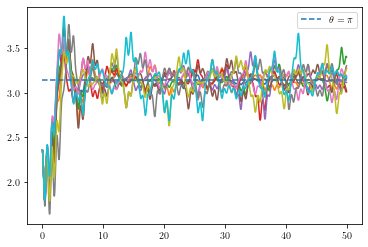

In [492]:
fig, ax = plt.subplots()

for i in range(len(eta)):
    ax.plot(tspan, z[i, 0, : ])
ax.plot(tspan,  np.pi * np.ones(n),'--', label = r'$\theta = \pi$')
ax.legend()
plt.show()

### (c)

In [485]:
tf = 500
dt = 0.05
n = int(tf/dt)

tspan = np.linspace(0, tf, n) 
A = 20
w = 8
k = 0.5
eta = np.linspace(0.101, 0.102, 2)
z = np.zeros((len(eta), 2, n))
for j in range(len(eta)):
    z[j, 0, 0] = 0.75 * np.pi
    z[j, 1, 0] = 0
    for i in range(n-1):
        z[j, 0, i+1] = z[j, 0 ,i] + z[j, 1, i] * dt
        z[j, 1, i+1] = z[j, 1, i] - (1 + A * np.cos(w * i * dt)) * np.sin(z[j, 0, i]) * dt - k * z[j, 1, i] * dt + eta[j]**0.5 * dW(dt)

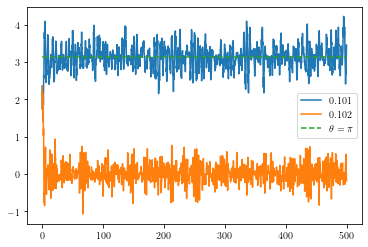

In [486]:
fig, ax = plt.subplots()

for i in range(len(eta)):
    ax.plot(tspan, z[i, 0, :], label=eta[i])
ax.plot(tspan,  np.pi * np.ones(n),'--', label = r'$\theta = \pi$')
ax.legend()
plt.show()

At round $\eta = 0.102$ the pendulum cannot be stably be driven at $\theta=\pi$ and collapses back to it's stable equilibrium at $\theta=\pi$

### (2) (c)

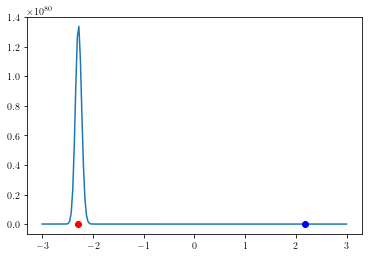

In [490]:
fig, ax = plt.subplots()
x = np.linspace(-3, 3, 200)
sig = 0.4
ax.plot(x, np.exp(-2/sig**2 * U(x)))
ax.plot(xmin_global, 0, 'ro')
ax.plot(xmin_local, 0, 'bo')
plt.show()